In [1]:
#web scrapping from "SKYTRAX" [Data collection]

In [82]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import  numpy as np

In [31]:
given_url = "https://www.airlinequality.com/airline-reviews/british-airways"
total_pages = 11
page_size = 100

In [84]:
#Creating the empty lists for further important findings from data
reviews = []




In [33]:
#we use for loop to scrap the reviews from all the 10 pages

for i in range (1, total_pages + 1):
    
    print(f"Scraping page {i}")
    
    #new url creation
    url = f"{given_url}/page/{i}/?sortby=post_date%3ADesc&pagessize={page_size}"
    
    #collecting HTML Data
    response = requests.get(url)
    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div",{"class": "text_content"}):
        reviews.append(para.get_text())
    
    
print(f"   --->> {len(reviews)} total available  reviews")     

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
   --->> 110 total available  reviews


In [34]:
df = pd.DataFrame()
df["reviews"] = reviews

In [35]:
df.head()

,reviews
0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,Not Verified | Very good service on this rout...
2,✅ Trip Verified | Flight mainly let down by ...
3,✅ Trip Verified | Another awful experience b...
4,"✅ Trip Verified | The service was rude, full..."


In [36]:
reviews

['Not Verified |  LHR T5 BA Gold Wing worked well. Pleasant check in and very fast security screening. Concorde room service attentive. C gate boarding OK but nothing special for First Passengers. Latest BA version of first with only 8 suites with privacy doors. Comfortable seat with plenty of stowage. Good screen and good choice of IFE. Amenity kit good quality and bedding, pillows cushions and blankets all good. Excellent menu and food very well presented. Cabin crew could not have been more attentive and helpful without being obtrusive. On time departure and early arrival. Bags delivered relatively swiftly and priority tagged bags were first off. All in all one of the best BA First flights I’ve had in many years. Whilst not touching the Middle Eastern carriers BA First on this showing is easily the best way to cross the Atlantic.',
 'Not Verified |  Very good service on this route BA2710 30th March. Cabin crew worked hard, particularly Ivka (?) who was on the go throughout the fligh

In [86]:
#Verified appears as True and not verified as False 
df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0      False
1      False
2       True
3       True
4       True
       ...  
105    False
106    False
107     True
108     True
109     True
Name: verified, Length: 110, dtype: bool

In [37]:
#Data Analysis and data cleaning
#adding another dataset for customer booking provided by British Airways

In [38]:
import pandas as pd

In [41]:
custo_book = pd.read_csv(r"C:\Users\HARSHAL PATIL\OneDrive\Desktop\customer_booking.csv", encoding = 'latin-1')

In [42]:
custo_book

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [44]:
custo_book.info

<bound method DataFrame.info of        num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6

In [45]:
custo_book.head(30)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [46]:
#basically first i have to make a predictive analysis model to find whether the customer will complete his booking in future  or not
#preferred "booking_complete" column

In [55]:
#loading dataset with explicit coding

In [62]:
data = pd.read_csv(r"C:\Users\HARSHAL PATIL\OneDrive\Desktop\customer_booking.csv",encoding ='iso=8859-1')

In [58]:
data 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [66]:
pd.get_option("display.max_rows")

60

In [67]:
data.shape

(50000, 14)

In [69]:
#statistical summary of the dataset

In [70]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [91]:
#checcking duplicates
sum (data.duplicated())

719

In [101]:
#Handling missing values
data.dropna(how= 'any')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [92]:
#Handling the missing the values
data = data.ffill()

In [97]:
data.fillna(method='pad')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [94]:
#checking datatypes
data.dtypes

num_passengers             int64
sales_channel              int32
trip_type                  int32
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int32
route                      int32
booking_origin             int32
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [102]:
#importing some machine learning models

In [103]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#working with categorical variables

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column]  = le

In [105]:
#finding matrix and target value

x= data.drop('booking_complete', axis=1)
y =data['booking_complete']

In [106]:
#splitting the dataset  into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2,random_state=42)

In [ ]:
#creating Random forest model for prediction

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

In [108]:
#Evaluate the model
y_pred = model.predict (x_test)
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print("\nclassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))
      

confusion matrix:
[[8395  125]
 [1313  167]]

classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000


Accuracy Score:
0.8562


In [110]:
#running crosss validation
cv_scores = cross_val_score(model, x,y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.851  0.4828 0.2464 0.3706 0.4996]
Mean cross-validation score: 0.49008


In [111]:
#Feature importance

In [116]:
feature_importances = model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features,'Importance':feature_importances})
importance_df = importance_df.sort_values(by='Importance',ascending = False)

In [ ]:
#Visualizations

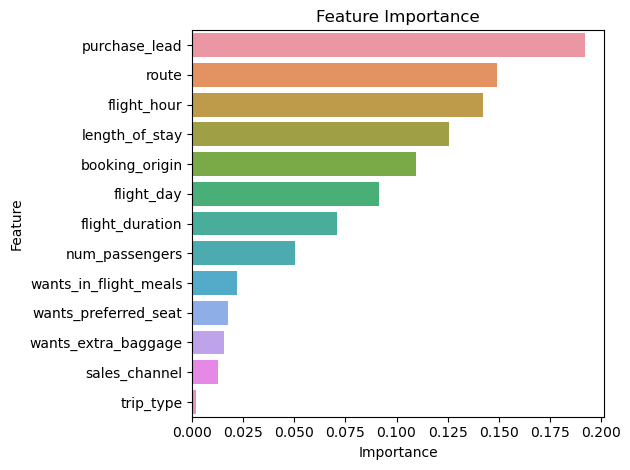

In [117]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
#Feature Importance Plot (MOST RECOMMENDED)
#Why: Helps stakeholders understand which factors most influence booking completion — very actionable!

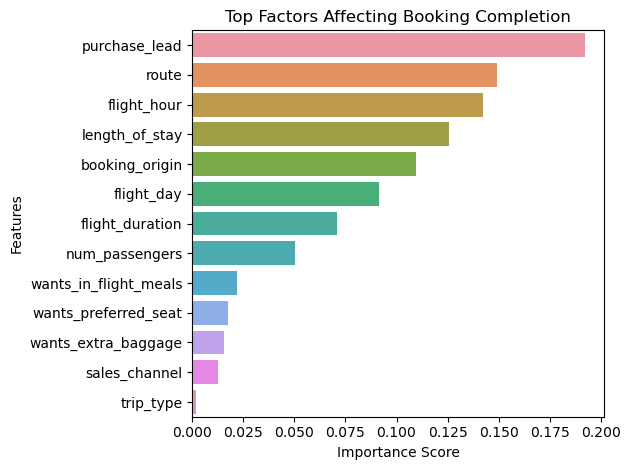

In [118]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top Factors Affecting Booking Completion")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

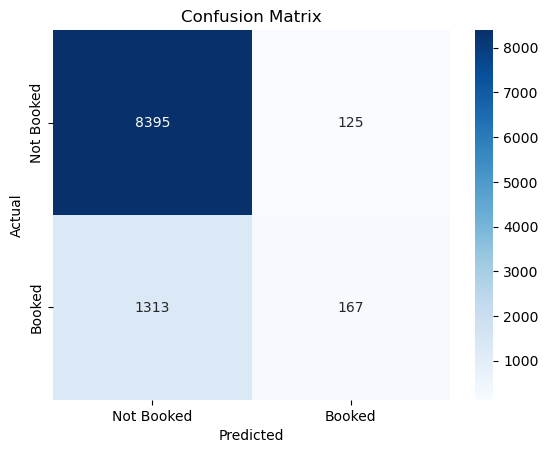

In [119]:
#Confusion Matrix Heatmap
#Why: Makes it easy to see where the model is doing well and where it's misclassifying.

#Helps understand model accuracy vs. errors.
#If false negatives are high, you may be missing potential bookings — critical insight!



cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


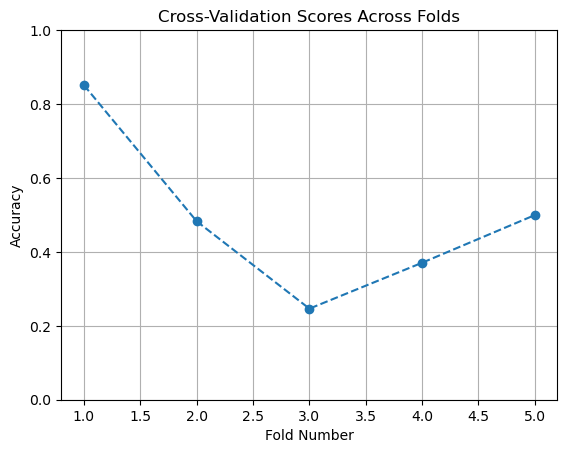

In [120]:
#Model Accuracy & Cross-Validation Scores
#Why: Demonstrates model reliability — especially with cross-validation

plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--')
plt.title("Cross-Validation Scores Across Folds")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


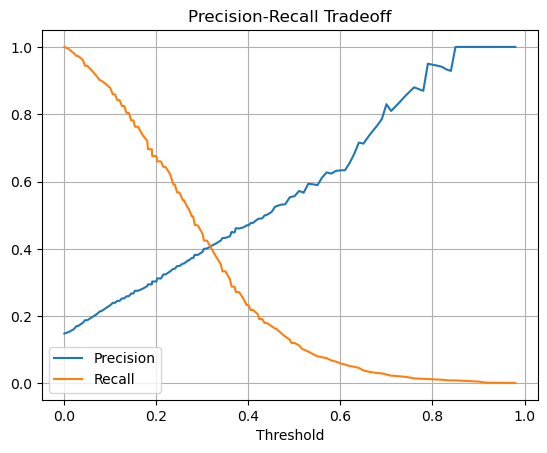

In [121]:
#Precision-Recall vs. Accuracy
#Helps decide how aggressive or conservative the model should be in predicting bookings.

